# Konstruktion Vertrauensintervall mit Bootstrap

Die Grundidee beim Bootstrap ist, dass aus einer Messreihe durch Resampling (zufälliges Generieren von Stichproben aus dieser Messreihe) Informationen über die Messreihe gewonnen werden können, wie zum Beispiel über die Unsicherheit der Schätzung des Erwartungswertes durch den Mittelwert. 

Wir betrachten eine Messreihe, die einer unbekannten Verteilung folgt und einen unbekannten Erwartungswert $ \mu $ hat.

Wir nennen die unbekannte Verteilung $ F $, und wir können den Mittelwert $ \overline{x} $ der Messreihe als Punktschätzung von $ \mu $ betrachten. Aber wie gut ist diese Schätzung? D.h. wie gross ist die mit dieser Schätzung verbundene Unsicherheit?

Im Folgenden betrachten wir die Messreihe `methode_B`. Beim Bootstrap wird eine zufällige Stichprobe durch Resampling aus der Messreihe `methode_B` gewonnen. Wir nennen diese zufällige Stichprobe _bootstrap sample_.

Das `Bootstrap sample` hat dieselbe Länge $ n $ wie die ursprüngliche Messreihe. Da der Standardfehler von der Länge der Messreihe abhängt, wird ein Bootstrap Sample mit derselben Länge gewählt.

In [1]:
import numpy as np
np.random.seed(1) 
methode_B = np.array([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 
79.97])

# Arithmetisches Mittel der Messreihe methode_B
print('Arithmetisches Mittel von Messreihe Methode B:', methode_B.mean())

# Länge n der Messreihe methode_B
n = methode_B.size 



# Anzahl Bootstrap samples
nboot = 1

bootstrap_sample = np.random.choice(methode_B, n*nboot, replace=True)

bootstrap_sample
print('Bootstrap Sample : ' , bootstrap_sample)
# Arithmetisches Mittel des Bootstrap Sample
print('Arithmetisches Mittel von Bootstrap Sample:' , bootstrap_sample.mean())

Arithmetisches Mittel von Messreihe Methode B: 79.97874999999999
Bootstrap Sample :  [80.03 79.97 79.97 80.02 79.97 79.94 79.97 80.03]
Arithmetisches Mittel von Bootstrap Sample: 79.9875


Mit `Python` erzeugen wir 20 `Bootstrap_Samples`, alle mit der Länge $ 8 $. Jede der 20 Spalten im folgenden Array ist ein Bootstrap-Sample.

In [2]:
# Anzahl Bootstrap Samples
nboot = 20
# 20 Bootstrap Samples werden in einem array mit 20 Spalten und 8 Zeilen angeordnet
bootstrap_sample = np.random.choice(methode_B, n*nboot, replace=True)
bootstrap_sample_array = np.reshape(bootstrap_sample, (n, nboot))
bootstrap_sample_array

array([[79.97, 80.02, 80.02, 79.94, 79.97, 79.97, 80.03, 79.97, 79.95,
        79.94, 79.98, 79.97, 79.95, 80.03, 79.98, 79.97, 79.97, 79.97,
        79.98, 79.97],
       [80.03, 79.95, 79.98, 79.97, 79.97, 79.97, 79.94, 79.94, 79.97,
        79.95, 80.02, 79.95, 80.03, 79.94, 79.94, 79.97, 79.97, 80.03,
        79.95, 79.94],
       [79.94, 80.02, 79.97, 79.94, 80.02, 80.02, 80.03, 79.97, 79.97,
        79.98, 79.94, 80.02, 79.95, 79.97, 79.97, 79.95, 80.03, 79.94,
        79.94, 79.97],
       [79.97, 80.02, 79.94, 79.97, 79.97, 79.98, 79.97, 80.02, 80.03,
        79.97, 79.94, 79.98, 79.97, 80.02, 79.97, 79.94, 79.97, 79.98,
        79.97, 79.97],
       [79.98, 79.94, 80.02, 79.95, 79.94, 79.97, 79.97, 79.95, 79.97,
        80.03, 79.97, 79.97, 80.03, 79.94, 79.97, 79.95, 80.02, 80.02,
        79.98, 79.98],
       [79.97, 79.97, 79.97, 79.97, 79.94, 79.97, 79.97, 79.97, 79.98,
        79.95, 79.95, 80.02, 80.02, 79.97, 79.97, 79.94, 79.94, 80.03,
        79.97, 80.02],
       [80

Wir berechnen nun die Mittelwerte in allen Spalten und ordnen Sie der Reihen nach:

In [3]:
# Mittelwerte der Datenpunkte entlang den Spalten werden mit Argument axis=0 berechnet
xbarstar = bootstrap_sample_array.mean(axis=0)

np.sort(xbarstar)
print(np.sort(xbarstar))

[79.9575  79.965   79.9675  79.96875 79.97    79.97125 79.97125 79.97625
 79.97625 79.9775  79.98125 79.98125 79.9825  79.9825  79.98375 79.985
 79.98625 79.9875  79.99    79.995  ]


Beim 95%-Bootstrap-Vertrauensintervall wählen wir die _mittleren_ 95% dieser Daten. Diese werden durch die 2.5%- und 97.5%-Quantile begrenzt. 

In [4]:
d = np.percentile(xbarstar, q=[2.5, 97.5])
print('Vertrauensintervall: ',d)

Vertrauensintervall:  [79.9610625 79.992625 ]


Wir können auch 10000 Bootstrap-Stichproben erzeugen, womit wir wesentlich genauere Abschätzungen für das 95%-Bootstrap-Vertrauensintervall erhalten.


In [5]:
# Anzahl Bootstrap Samples
nboot = 10000
# Wir ordnen die 10'000 Bootstrap Samples in einem array mit 10'000 Spalten an
bootstrap_sample = np.random.choice(methode_B, n*nboot, replace=True)
bootstrap_sample_array = np.reshape(bootstrap_sample, (n, nboot))
# Wir berechnen für jedes Bootstrap Sample den Mittelwert
xbarstar = bootstrap_sample_array.mean(axis=0)
# Wir erhalten das Vertrauensintervall, indem wir die Intervallsgrenzen der mittleren 95% 
# der Mittelwerte betrachten
d = np.percentile(xbarstar, q=[2.5, 97.5])
print('Vertrauensintervall: ',d)

Vertrauensintervall:  [79.96    79.99875]


## Interpretation von Vertrauensintervallen

Wir simulieren nun Daten, deren wahres $ \mu $ wir kennen. Dazu wählen wir 100 Zufallszahlen, die der Verteilung $ \mathcal{N}(40,5^{2}) $ folgen. Das wahre $ \mu $ ist also 40. Wir können uns nun fragen, ob dieses $ \mu $ nun im entsprechenden 95% Bootstrap-Vertrauensintervall liegt oder nicht. 

In [6]:
import numpy as np

x = np.random.normal(loc=40,scale=5,size=100)

n = x.size 

np.random.seed(8)
xbar = x.mean()

# Anzahl Bootstrap Samples
nboot = 20

# Erzeuge Bootstrap Samples
bootstrap_samples = np.random.choice(x, n*nboot, replace=True)

bootstrap_sample_array = np.reshape(bootstrap_samples, (n, nboot))

# Arithmetisches Mittel für jedes Bootstrap Sample
xbarstar = bootstrap_sample_array.mean(axis=0)

# 2.5% und 97.5% Quantile der Mittelwerte der 100 Bootstrap Samples
ci = np.percentile(xbarstar, q=[2.5, 97.5])
print("Vertrauensintervall: ",ci)

Vertrauensintervall:  [38.62771353 40.5791209 ]


Das wahre $ \mu $ liegt in diesem Intervall. Ist dies aber immer der Fall? Wir generieren nun 100 Testreihen, wobei jede Testreihe 100 normalverteilte Zufallszahlen mit Mittelwert 40 enthält. Wir bestimmen für jede Testreihe das Vertrauensintervall und schauen, ob das wahre $ \mu $ darin liegt. 

In [7]:
import numpy as np
np.random.seed(8)
# Wir erzeugen 10'000 normalverteilte Zufallszahlen 
# mit Mittelwert 40 und Standardabweichung 5
x = np.random.normal(loc=40, scale=5, size=10000)

# Wir ordnen diese Zahlen in einem Array an, der aus 100 Zeilen 
# und 100 Spalten besteht
measurement_array = np.reshape(x,(100,100))
print(measurement_array.shape)
print(measurement_array[1].size)

# Anzahl Bootstrap Samples
nboot = 1000

# Länge von jedem Bootstrap sample
n = 100

# k zählt Anzahl Vertrauensintervalle, die das 
# wahre mu=40 nicht enthalten
k=0
# Wir iterieren über alle 100 Testreihen und bestimmen für jede 
# Testreihe ein Vertrauensintervall (mittels bootstrap)
for i in range(0,100):
    x = measurement_array[i]
    # Arithmetisches Mittel pro Zeile im Array wird berechnet
    xbar = x.mean()
    # für die Zeile x wird nun ein Vertrauensintervall
    # mittels Bootstrap konstruiert
    bootstrap_samples = np.random.choice(x, n*nboot, replace=True)
    bootstrap_sample_array = np.reshape(bootstrap_samples, (n, nboot))
    xbarstar = bootstrap_sample_array.mean(axis=0)
    ci = np.percentile(xbarstar, q=[2.5, 97.5])
    # Falls 40 im Vertrauensintervall für Zeile i NICHT enthalten ist
    # wird k um 1 erhöht
    if ci[0]<= 40 <= ci[1]:
        k=k+1
    
print(k)

(100, 100)
100
96


Wir können dies auch noch graphisch darstellen. Wir bestimmen für jede Testreihe ein 95% Bootstrap-Vertrauensintervall. Zudem ist das wahre Mittel $ \mu=40 $ eingezeichnet. Wir sehen, dass vier Vertrauensintervalle (schwarz eingezeichnet) die horizontale Linie 40 nicht schneidet. Diese Vertrauensintervalle enthalten somit das wahre Mittel _nicht_. Daher ist das wahre Mittel in 96% aller 95%-Vertrauensintervalle enthalten. 

(100, 100)


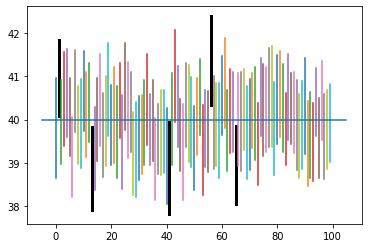

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#np.random.seed(8)

# Wir generieren 10'000 normalverteilte Zufallszahlen
# mit Mittelwert 40 und Standardabweichung 5
x = np.random.normal(loc=40, scale=5, size=10000)

# Wir ordnen die Zufallszahlen in einem array mit 100 Spalten
# und 100 Zeilen an
measurement_array = np.reshape(x,(100,100))
print(measurement_array.shape)

# Anzahl Bootstrap Samples
nboot = 10000
n = 100

# Wir iterieren über die 100 Testreihen
for i in range(0,100):
    # wir lesen die i-te Zeile aus dem measurement_array heraus
    y = measurement_array[i]
    # Bestimmung des Vertrauensintervalls der i-ten Testreihe
    tmpdata = np.random.choice(y, n*nboot, replace=True)
    bootstrapsample = np.reshape(tmpdata, (n, nboot))
    xbarstar = bootstrapsample.mean(axis=0)
    ci = np.percentile(xbarstar, q=[2.5, 97.5])
    plt.plot([i,i],[ci[0], ci[1]])
    if (ci[0]<= 40 <= ci[1])==False:
        plt.plot([i,i],[ci[0], ci[1]], c="black",linewidth=3)


plt.plot([-5,105],[40,40])

plt.show()
  

In [9]:
import scipy.stats as st
from scipy.stats import t
import numpy as np
t.interval(alpha=0.95, df=4, loc=512, scale=np.sqrt(106.5)/np.sqrt(5))

(499.1861719188852, 524.8138280811148)